In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("data1.csv")

In [3]:
top10_ted_views = data1.sort_values(by = 'ted_views',ascending=False).head(10)

In [4]:
top10_you_views = data1.sort_values(by = 'youtube_views',ascending=False).head(10)

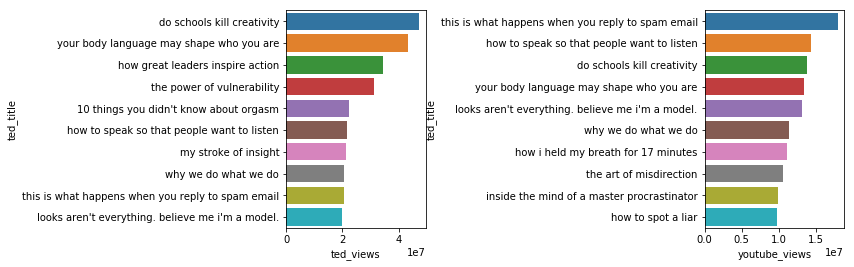

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 4),ncols=2,nrows=1)
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 2)


g = sns.barplot(x='ted_views',y='ted_title',data=top10_ted_views,ax = ax[0])
#g.set_xlim(0,50000000)
sns.barplot(x='youtube_views',y='ted_title',data=top10_you_views,ax=ax[1])


In [6]:
import ast
df_list=[]

for index,row in data1.iterrows():
    ratings_list = ast.literal_eval(row.ted_ratings)
    ratings_df = pd.DataFrame(ratings_list)
    ratings_df['title']=row.ted_title
    df_list.append(ratings_df)
    

In [7]:
ratings = pd.concat(df_list,axis=0)
ratings.reset_index(drop=True,inplace=True)

In [8]:
Expression_Count = ratings.groupby('name')['count'].agg(['sum']).sort_values('sum',ascending=False)
Expression_Count = Expression_Count.reset_index()

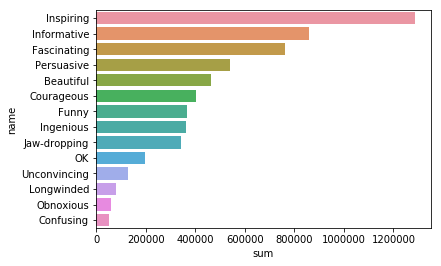

In [9]:
sns.barplot(y='name',x='sum',data=Expression_Count)

In [10]:
ratings = ratings.rename(columns={'name':'Expression','count':'Votes','title':'Talk'})

In [11]:
top10_tedviews_ratings = pd.merge(ratings,top10_ted_views,left_on='Talk',right_on='ted_title')

In [12]:
top10_youtubeviews_ratings = pd.merge(ratings,top10_you_views,left_on='Talk',right_on='ted_title')

In [13]:
top_ratings_graph = top10_tedviews_ratings[['ted_title','Expression','Votes']]

tp= top_ratings_graph.sort_values('Votes',ascending= False)
top_youtube_ratings = top10_youtubeviews_ratings[['ted_title','Expression','Votes']]
yp= top_youtube_ratings.sort_values('Votes',ascending= False)

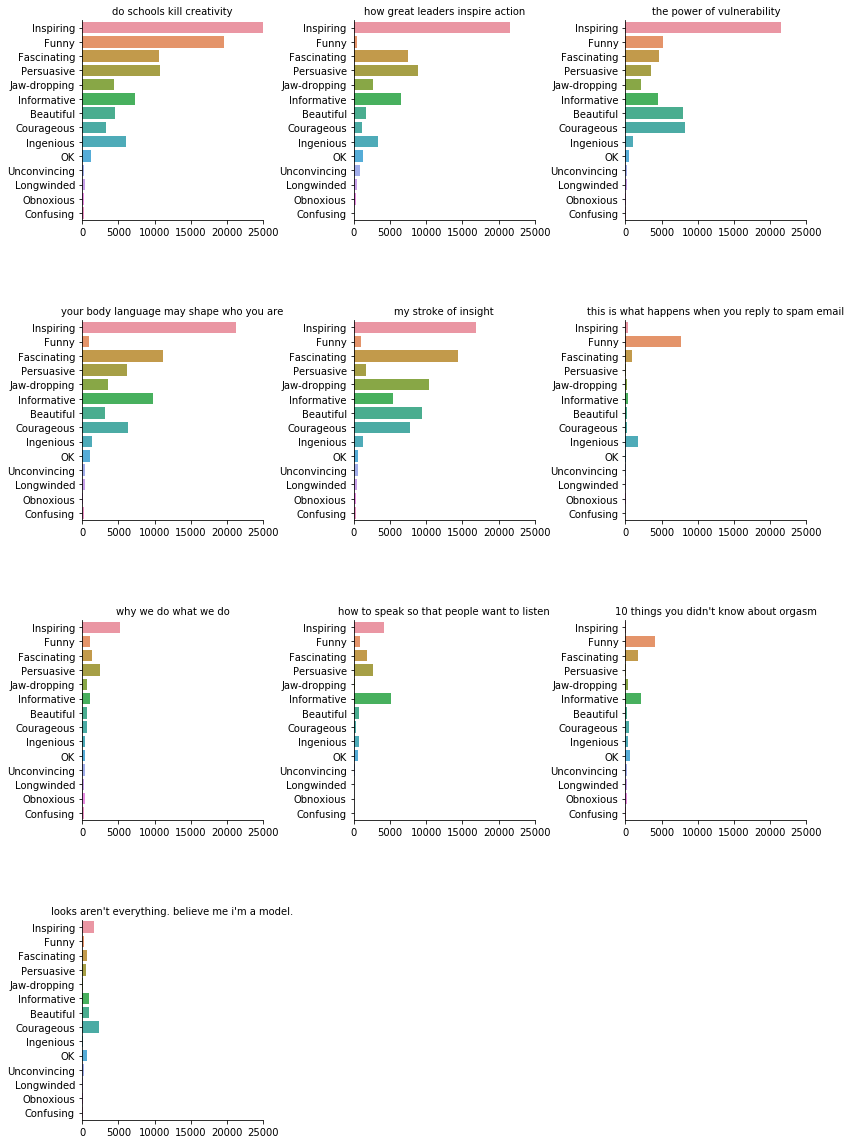

In [14]:
g = sns.factorplot(x='Votes',y='Expression',data=tp,col='ted_title',col_wrap=3,kind='bar',sharex=False,sharey=False,margin_titles=True)
#g.set_xticklabels(rotation = 20)
g.set_titles("{col_name}")
g.set_ylabels('')
g.set_xlabels('')
g.set(xlim=(0,25000))
plt.tight_layout()
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)

#.set_titles("{col_name} diners"))

In [15]:
Total_ratings =ratings.groupby('Talk')['Votes'].agg(['sum'])

Total_ratings.reset_index(inplace=True)
Total_ratings = Total_ratings.rename(columns={'sum':'Ted_nof_ratings'})

data1['youtube_total_ratings'] = data1['youtube_likes']+data1['youtube_dislikes']
data1 = pd.merge(data1,Total_ratings,left_on='ted_title',right_on='Talk')


In [16]:
ratings_stat = data1[['ted_title','ted_views','Ted_nof_ratings','ted_nof_comments','youtube_views','youtube_total_ratings']]
ratings_stat['ted_ratio']=ratings_stat['Ted_nof_ratings']/ratings_stat['ted_views']
ratings_stat['youtube_ratio']=ratings_stat['youtube_total_ratings']/ratings_stat['youtube_views']

ratings_stat.sort_values(by=['ted_ratio','youtube_ratio'],ascending=False).head(25)

C:\Users\Sivakumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sivakumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ted_title,ted_views,Ted_nof_ratings,ted_nof_comments,youtube_views,youtube_total_ratings,ted_ratio,youtube_ratio
567,building a park in the sky,704205,8023,92,53078,996.0,0.011393,0.018765
519,transplant cells not organs,620231,6859,273,54684,646.0,0.011059,0.011813
1624,why gun violence can't be our new normal,1096198,10251,335,70928,2972.0,0.009351,0.041902
2191,i believe we evolved from aquatic apes,1038576,6680,621,122793,2106.0,0.006432,0.017151
763,from stigma to supermodel,166959,903,59,9092,98.0,0.005409,0.010779
2251,the cockroach beatbox,303986,1629,152,216132,9574.0,0.005359,0.044297
2256,3 new ways to kill mosquitoes,264684,1328,182,10115,108.0,0.005017,0.010677
708,the true cost of oil,792779,3908,775,19696,421.0,0.004929,0.021375
2301,why we all need to practice emotional first aid,4984884,24410,271,774880,20086.0,0.004897,0.025921
2188,17 words of architectural inspiration,784642,3779,423,88133,614.0,0.004816,0.006967


In [17]:
data1[['youtube_views','ted_views']].corr()

,youtube_views,ted_views
youtube_views,1.000000,0.851989
ted_views,0.851989,1.000000


In [18]:
ted_women = data1[data1.ted_event.str.contains('Women')]

In [20]:
ted_women['ted_views'].var()

1474212873010.5562

In [21]:
data1['ted_views'].var()

6474425953066.264

1462751.9259259258

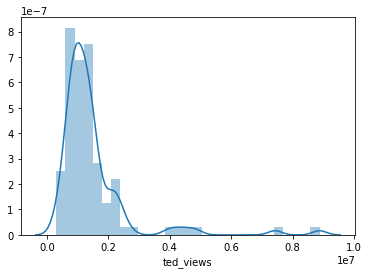

In [22]:
sns.distplot(ted_women.ted_views)
ted_women.ted_views.mean()

1749391.1602990034

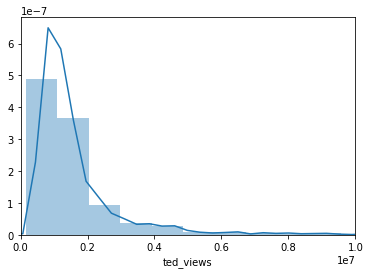

In [23]:
g = sns.distplot(data1.ted_views,hist=True)
g.set(xlim=(0,10000000))

data1.ted_views.mean()

In [24]:
data1['ted_duration'].describe()

count    2408.000000
mean      820.507475
std       330.996784
min       140.000000
25%       582.000000
50%       850.000000
75%      1045.250000
max      3608.000000
Name: ted_duration, dtype: float64

In [29]:
long_talk = data1[data1['ted_duration'] > 820]

In [25]:
neg_ratings = ratings[ratings['Expression'].isin(['Longwinded'])].sort_values('Votes',ascending=False)

In [27]:
top_long_ratings = neg_ratings[(neg_ratings['Votes'] > 100)]

In [30]:
long_merge = pd.merge(long_talk,neg_ratings,left_on='ted_title',right_on='Talk')

In [37]:
long_merge[['ted_title','youtube_views','ted_views','ted_duration','Votes','youtube_dislikes','youtube_likes']].sort_values(by=['Votes'],ascending=False)


,ted_title,youtube_views,ted_views,ted_duration,Votes,youtube_dislikes,youtube_likes
1168,17 words of architectural inspiration,88133,784642,1116,447,85.0,529.0
69,my stroke of insight,4956314,21190883,1099,398,974.0,35350.0
242,how great leaders inspire action,7234323,34309432,1084,390,1609.0,65386.0
1283,do schools kill creativity,13838924,47227110,1164,387,1986.0,133506.0
47,what our language habits reveal,310190,1914263,1047,352,86.0,1942.0
132,your elusive creative genius,3236367,13155478,1149,351,1129.0,30551.0
524,your body language may shape who you are,13402518,43155405,1262,338,3214.0,171501.0
5,a life of purpose,605052,3095993,1262,306,1168.0,4498.0
3,why we do what we do,11424257,20685401,1305,285,3003.0,60423.0
318,the power of vulnerability,7058613,31168150,1219,283,1534.0,75010.0


In [38]:
long_merge['ratio'] = long_merge['youtube_dislikes']/(long_merge['youtube_likes']+long_merge['youtube_dislikes'])

In [44]:
long_merge[['ted_title','youtube_views','ted_views','ted_duration','Votes','youtube_dislikes','youtube_likes','ratio']].sort_values(by=['Votes'],ascending=False).head(25)

,ted_title,youtube_views,ted_views,ted_duration,Votes,youtube_dislikes,youtube_likes,ratio
1168,17 words of architectural inspiration,88133,784642,1116,447,85.0,529.0,0.138436
69,my stroke of insight,4956314,21190883,1099,398,974.0,35350.0,0.026814
242,how great leaders inspire action,7234323,34309432,1084,390,1609.0,65386.0,0.024017
1283,do schools kill creativity,13838924,47227110,1164,387,1986.0,133506.0,0.014658
47,what our language habits reveal,310190,1914263,1047,352,86.0,1942.0,0.042406
132,your elusive creative genius,3236367,13155478,1149,351,1129.0,30551.0,0.035638
524,your body language may shape who you are,13402518,43155405,1262,338,3214.0,171501.0,0.018396
5,a life of purpose,605052,3095993,1262,306,1168.0,4498.0,0.206142
3,why we do what we do,11424257,20685401,1305,285,3003.0,60423.0,0.047347
318,the power of vulnerability,7058613,31168150,1219,283,1534.0,75010.0,0.020041


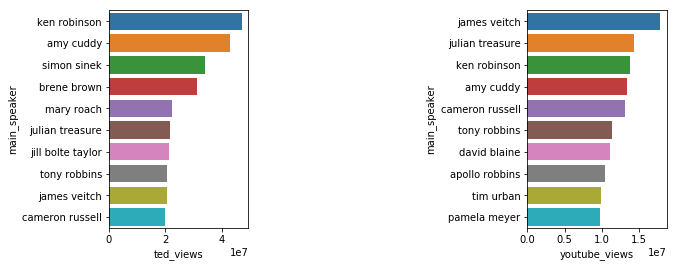

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 4),ncols=2,nrows=1)
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 2)


g = sns.barplot(x='ted_views',y='main_speaker',data=top10_ted_views,ax = ax[0])
#g.set_xlim(0,50000000)
sns.barplot(x='youtube_views',y='main_speaker',data=top10_you_views,ax=ax[1])


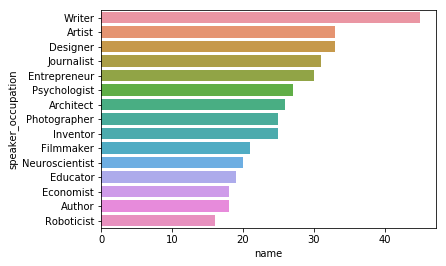

In [41]:
t= (data1.groupby('speaker_occupation')['name'].count().sort_values(ascending = False).head(15)).to_frame().reset_index()
sns.barplot(y='speaker_occupation',x='name',data=t)

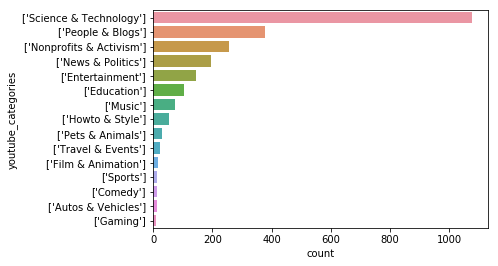

In [43]:
categories_count = data1.groupby('youtube_categories')['ted_title'].agg(['count']).sort_values('count',ascending=False)
categories_count.reset_index(inplace=True)

sns.barplot(x='count',y='youtube_categories',data=categories_count)